# Exploratory Data Analysis (EDA) &  Data Visualization:


In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
plt.rcParams['figure.figsize'] = (5,3)
plt.rcParams['figure.dpi'] = 100
sns.set_theme(style='darkgrid', palette='rainbow')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(999, 10)

In [4]:
df.isnull().sum()

RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 18.4 KB


In [9]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


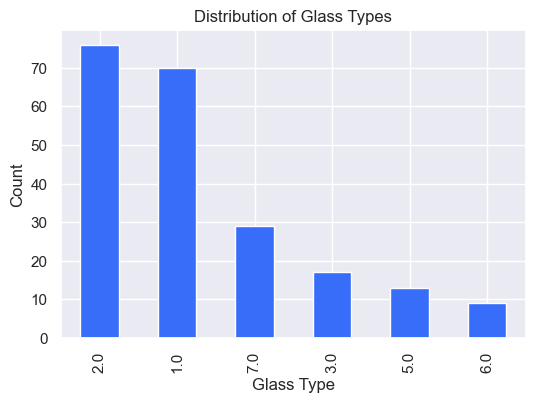

In [10]:
plt.figure(figsize=(6,4))
df['Type'].value_counts().plot(kind='bar')
plt.title("Distribution of Glass Types")
plt.xlabel("Glass Type")
plt.ylabel("Count")
plt.show()

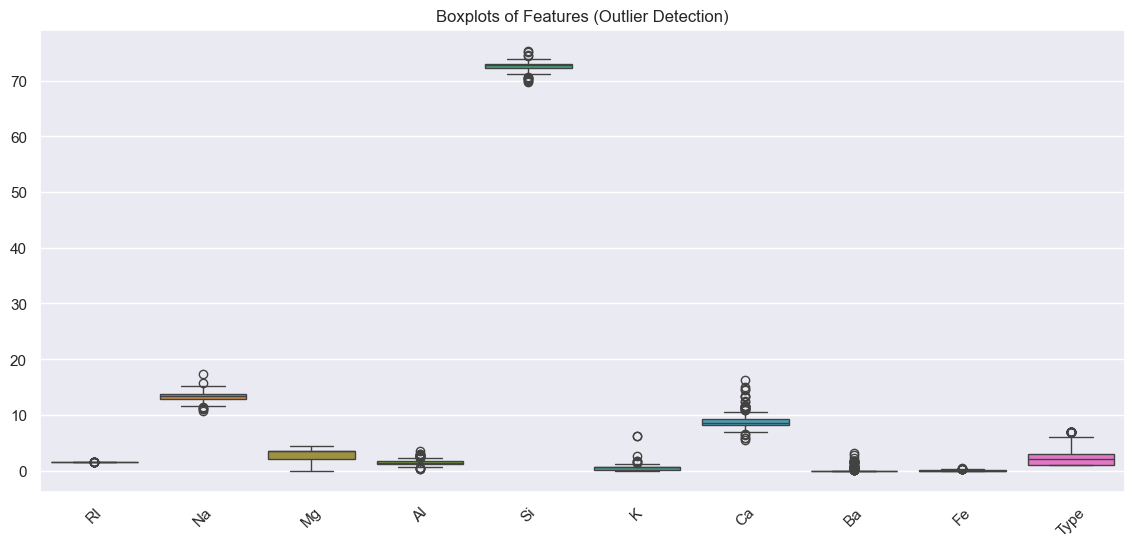

In [11]:
# Boxplots for detecting outliers
plt.figure(figsize=(14, 6))
sns.boxplot(data=df)
plt.title("Boxplots of Features (Outlier Detection)")
plt.xticks(rotation=45)
plt.show()

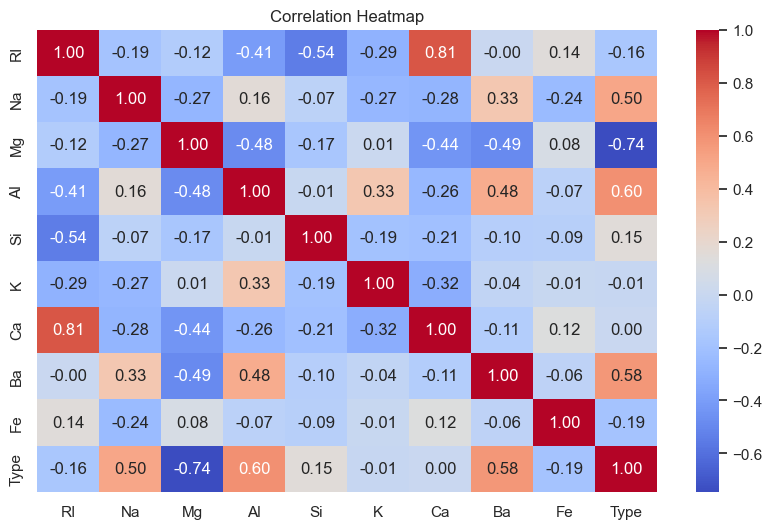

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


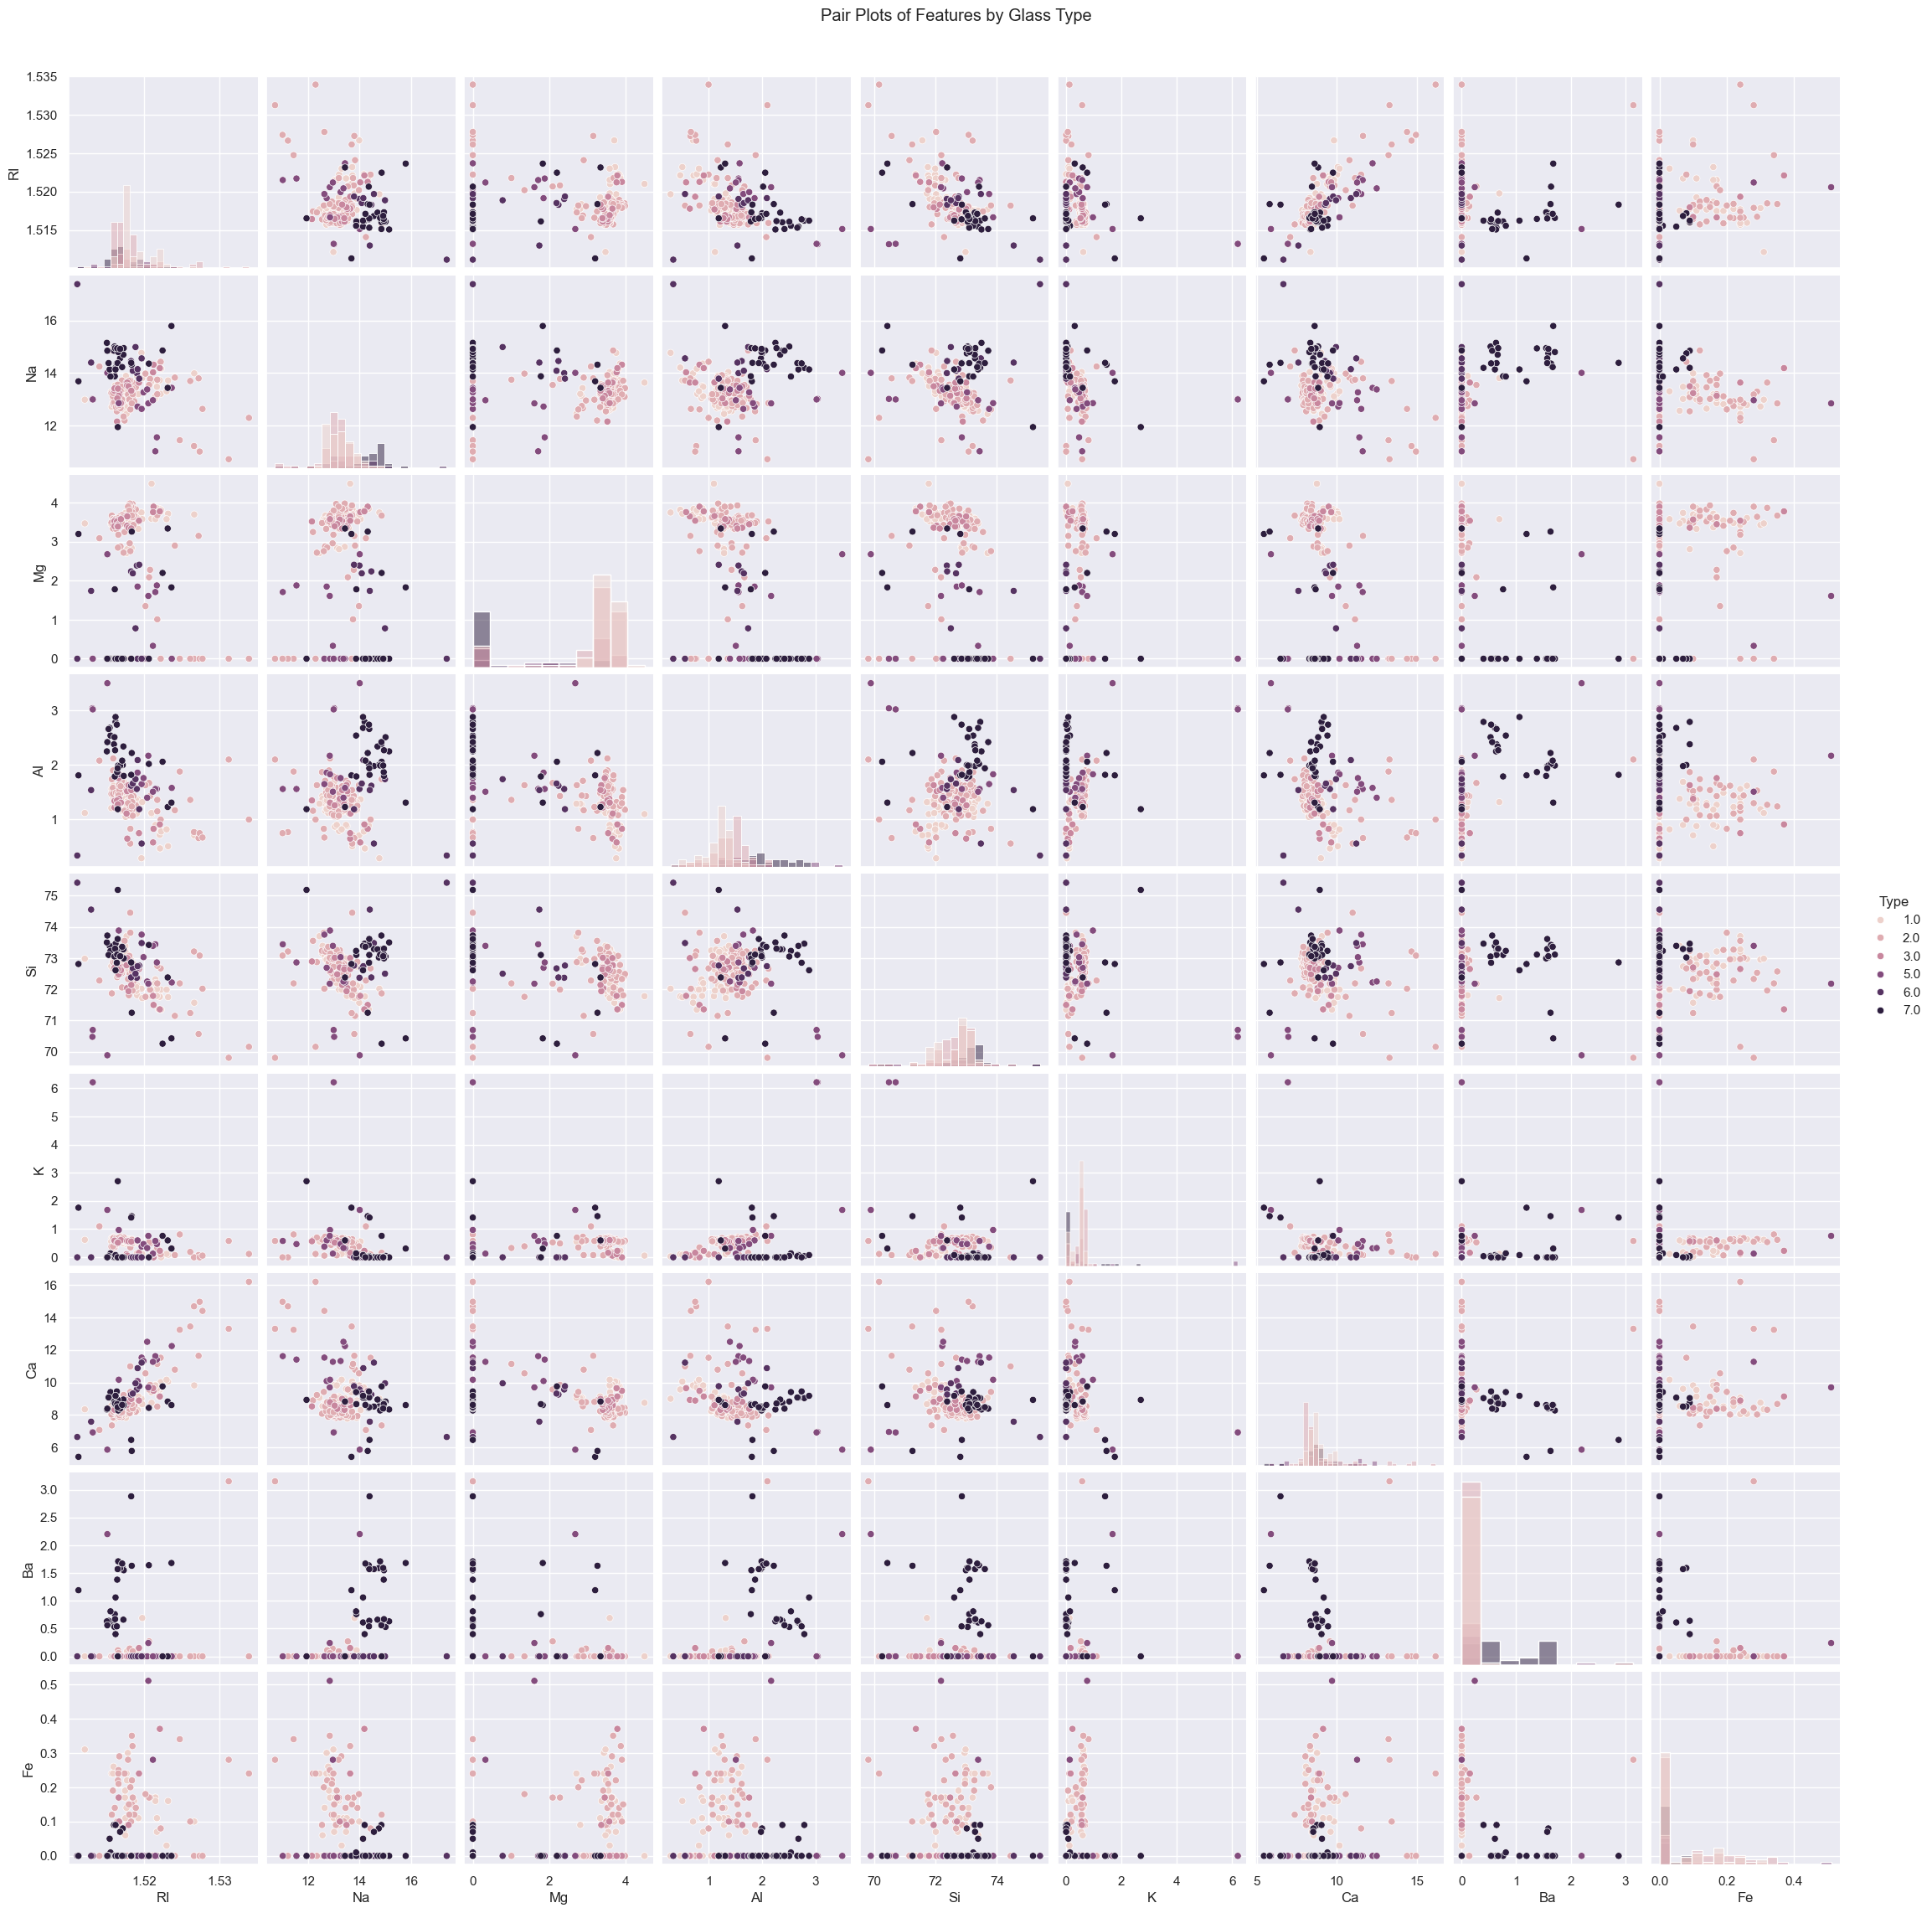

In [13]:
# pair plot 
sns.pairplot(df, hue="Type", diag_kind="hist")
plt.suptitle("Pair Plots of Features by Glass Type", y=1.02)
plt.show()

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [15]:
# Feature Scaling
X = df.drop("Type", axis=1)   # Features
y = df["Type"]                # Target

In [16]:
# Split before scaling to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [17]:
# Standardization (mean=0,std=1)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [18]:
y_train.value_counts()

Type
2.0    61
1.0    56
7.0    23
3.0    14
5.0    10
6.0     7
Name: count, dtype: int64

In [19]:
# random forest classifier 
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train_scaled,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
y_pred=rf.predict(X_test_scaled)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accuracy_score(y_test, y_pred)

0.8372093023255814

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.76      0.93      0.84        14
         2.0       0.85      0.73      0.79        15
         3.0       1.00      0.67      0.80         3
         5.0       1.00      0.67      0.80         3
         6.0       0.67      1.00      0.80         2
         7.0       1.00      1.00      1.00         6

    accuracy                           0.84        43
   macro avg       0.88      0.83      0.84        43
weighted avg       0.85      0.84      0.84        43



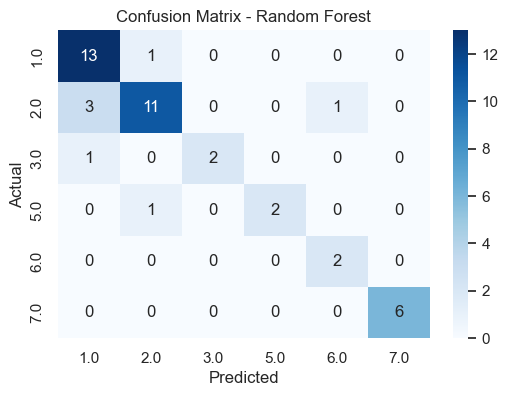

In [23]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

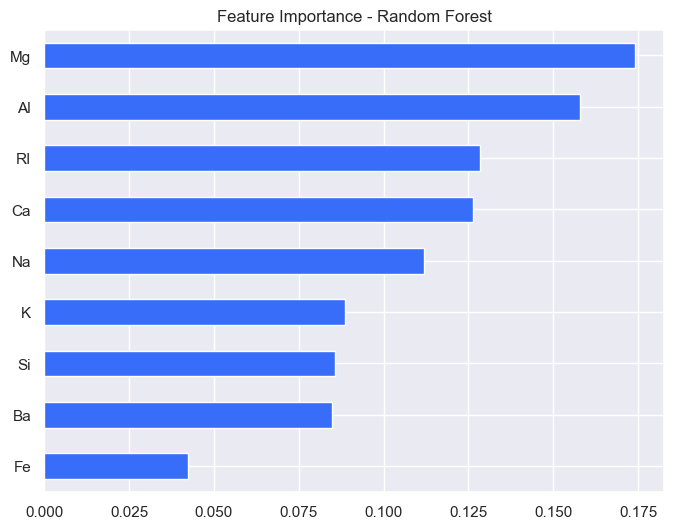

In [24]:
# Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", figsize=(8,6))
plt.title("Feature Importance - Random Forest")
plt.show()

In [25]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

In [26]:
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1-score :", f1)

Accuracy : 0.8372093023255814
Precision: 0.8542214739205162
Recall   : 0.8372093023255814
F1-score : 0.835526738827564


# Bagging and Boosting Methods


In [27]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier


In [28]:
models = {
    "Random Forest (Bagging)" : RandomForestClassifier(n_estimators=100, random_state=42),
    "Bagging (Decision Tree)" : BaggingClassifier(n_estimators=100, random_state=42),
    "AdaBoost"                : AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting"       : GradientBoostingClassifier(n_estimators=100, random_state=42)
}

In [29]:
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    results[name] = [acc, prec, rec, f1]

In [30]:
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-score"]).T
display(results_df)

,Accuracy,Precision,Recall,F1-score
Random Forest (Bagging),0.837209,0.854221,0.837209,0.835527
Bagging (Decision Tree),0.813953,0.822523,0.813953,0.811869
AdaBoost,0.395349,0.466667,0.395349,0.363817
Gradient Boosting,0.837209,0.849066,0.837209,0.835500


- We use this method to check which performs better on Glass dataset -> important analysis & reporting 

### Q1. Explain Bagging and Boosting methods. How is it different from each other.
ANS:
### Bagging (Bootstrap Aggregating)
- Bagging is an **ensemble learning technique** that reduces variance and helps avoid overfitting.  
- It works by creating multiple subsets of the training dataset using **bootstrapping** (sampling with replacement).  
- Each subset is used to train a separate model (e.g., decision trees).  
- The final prediction is obtained by **majority voting** (classification) or **averaging** (regression).  
- Example: Random Forest is a popular bagging algorithm.

**Advantages:**
- Reduces overfitting.  
- Works well with high variance models.  
- Improves stability and accuracy.


### Boosting
- Boosting is an **ensemble learning technique** that reduces bias and improves accuracy.  
- Models are trained **sequentially**, where each new model tries to correct the errors of the previous one.  
- It assigns **higher weights** to misclassified samples, so the next learner focuses more on those hard examples.  
- The final model is a **weighted combination** of all weak learners.  
- Examples: **AdaBoost, Gradient Boosting, XGBoost**.  

**Advantages:**
- Improves weak learners (like shallow decision trees).  
- Achieves higher accuracy than bagging in many cases.  
- Handles complex patterns better. 


### Q2. Explain how to handle imbalance in the data.

ANS

##  Handling Imbalanced Data

###  What is Imbalanced Data?
- Imbalanced data occurs when the **target classes are not equally represented**.  
- Example: In the Glass dataset, some glass types have many samples, while others have very few.  
- This imbalance can cause the model to be biased toward the majority class and perform poorly on minority classes.


### Techniques to Handle Imbalanced Data

1. **Resampling Techniques**
   - **Oversampling (e.g., SMOTE)**: Add synthetic or duplicate samples of the minority class.  
   - **Undersampling**: Remove samples from the majority class to balance the dataset.  
   - **Combination of both**: Use oversampling + undersampling for better results.

2. **Use of Appropriate Metrics**
   - Instead of only accuracy, use **Precision, Recall, F1-score, ROC-AUC**.  
   - These metrics give a better picture of performance on minority classes.

3. **Class Weights**
   - Assign higher weights to minority classes and lower weights to majority classes.  
   - Many algorithms in scikit-learn (like RandomForestClassifier, LogisticRegression) have a parameter class_weight='balanced'.

4. **Ensemble Methods**
   - Algorithms like **Random Forest, Gradient Boosting, XGBoost** handle imbalance better due to their resampling/weighting strategies.



In [31]:
########################################